Stein Unbiased Risk Estimator
=============================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This tour uses the Stein Unbiased Risk Estimator (SURE) to optimize the
value of parameters in denoising algorithms.

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

Denoising and SURE
------------------
We consider a simple generative model of noisy images $F = f_0+W$
where $f_0 \in \RR^N$ is a deterministic image of $N$ pixels, and
$W$ is a Gaussian white noise distributed according to $\Nn(0,\si^2
\text{Id}_N)$, where $\si^2$ is the variance of noise.


The goal of denoising is to define an estimator $h(F)$ of
$f_0$ that depends only on $F$,
where $h : \RR^N \rightarrow \RR^N$ is a potentially non-linear
mapping.


Note that while $f_0$ is a deterministic image, both $F$ and $h(F)$
are random variables (hence the capital letters).


The goal of denoising is to reduce as much as possible the denoising
error given some prior knowledge on the (unknown) image $f_0$.
A mathematical way to measure this error is to bound the
quadratic risk $\EE_W(\norm{h(F) - f_0}^2)$, where the expectation is computed
with respect to the distribution of the noise $W$


For real life applications, one does not have access to the underlying
image $f_0$. In this tour, we however assume that $f_0$ is known, and
$f = f_0 + w\in \RR^N$ is generated using a single realization of the noise $w$
that is drawn from $W$. We define the estimated deterministic image as
$h(f)$ which is a realization of the random vector
$h(F)$.


Number $N = n \times n$ of pixels.

In [2]:
n = 128*2
N = n^2;

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


First we load an image $f \in \RR^N$ where $N=n \times n$ is the number of pixels.

In [3]:
f0 = load_image("NtToolBox/src/data/hibiscus.png", n);

Display it.

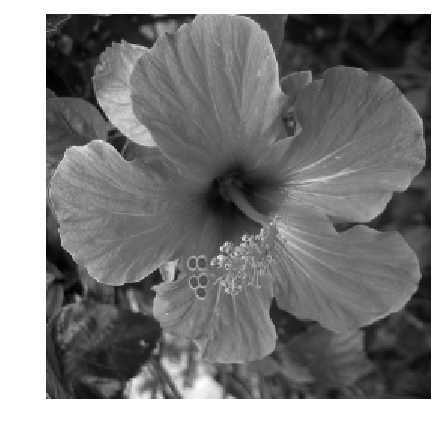

In [4]:
figure(figsize = (5, 5))
imageplot(f0)

Standard deviation $\si$ of the noise.

In [5]:
sigma = .08;

Then we add Gaussian noise $w$ to obtain $f=f_0+w$.

In [6]:
using Distributions
f = f0 .+ sigma.*rand(Normal(), n, n);

Display the noisy image. Note the use of the clamp function to force the result to be in $[0,1]$ to avoid a loss of contrast of the display.

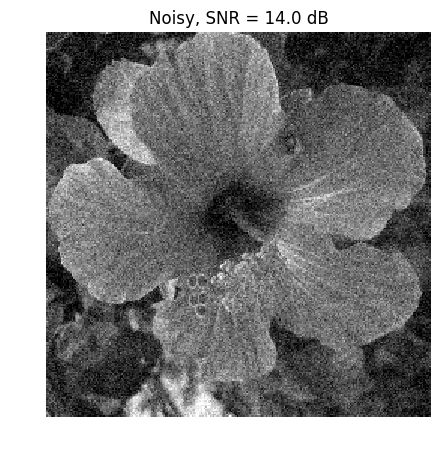

PyObject <matplotlib.text.Text object at 0x000000001AC8F630>

In [7]:
figure(figsize = (5, 5))
imageplot(clamP(f), @sprintf("Noisy, SNR = %.1f dB", snr(f0, f)))

The Stein Unbiased Risk Estimator (SURE) associated to the mapping $h$
is defined as

$$ \text{SURE}(f) = -N\si^2 + \norm{h(f)-f}^2 + 2\si^2 \text{df}(f) $$

where df stands for _degree of freedom,_ and is defined as

$$ \text{df}(f) = \text{div} h(f) = \sum_i \pd{h}{f_i}(f). $$


It has been introduced in:


Stein, Charles M. (November 1981).
"Estimation of the Mean of a Multivariate Normal Distribution".
The Annals of Statistics 9 (6): 1135-1151.


And it has been applied to wavelet-based non-linear denoising in:


Donoho, David L.; Iain M. Johnstone (December 1995).
"Adapting to Unknown Smoothness via Wavelet Shrinkage".
Journal of the American Statistical Association (Journal of the American Statistical Association,
Vol. 90, No. 432) 90 (432): 1200-1244.


If the mapping $f \mapsto h(f)$ is differentiable outside a set of
zero measure (or more generally weakly differentiable),
then SURE defines an unbiased estimate of the quadratic risk :

$$ \EE_W(\text{SURE}(F)) = \EE_W( \norm{f_0-h(F)}^2 ). $$

This is especially useful, since the evaluation of SURE does not
necessitate the knowledge of the clean signal $f_0$ (but note however
that it requires the knowledge of the noise level $\si$).


In practice, one replaces $\text{SURE}(F)$ from its empirical
evaluation $\text{SURE}(f)$ on a single realization $f$.
One can then minimize $\text{SURE}(f)$ with respect to a parameter
$\la$ that parameterizes the denoiser $h=h_\la$.


Linear Denoising SURE
---------------------
We consider a translation-invariant linear denoising operator, which is
thus a convolution

$$ h(f) = g \star h $$

where $g \in \RR^N$ is a low pass kernel, and $\star$ denotes the
periodic 2-D convolution.


Since we use periodic boundary condition, we compute the
convolution as a multiplication over the Fourier domain.

$$ \forall \om, \quad \hat h(f)(\om) = \hat f(\om) \hat g(\om) $$

where $\hat g(\om)$ is the frequency $\om$ of the discrete 2-D
Fourier transform of $g$ (computed using the pylab function fft2 from the pylab package).

In [8]:
convol = (f, g) -> real(plan_ifft((plan_fft(f)*f).*(plan_fft(g)*g))
*((plan_fft(f)*f).*(plan_fft(g)*g)))

(::#1) (generic function with 1 method)

We define a parameteric kernel $g_\la$ parameterized by its bandwidth
$\la>0$. We use here a Gaussian kernel

$$ g_\la(a) = \frac{1}{Z_\la} e^{ -\frac{\norm{a}}{2 \la^2} } $$
where $Z_\la$ ensures that $\sum_a g_\la(a) = 1$.

In [9]:
include("ndgrid.jl")
normalize = f -> f./sum(f)
x = [collect(0 : Base.div(n, 2)); collect(-Base.div(n, 2) + 1 : -1)]
(Y, X) = meshgrid(x, x)
g = lambd -> normalize(exp(-(X.^2 .+ Y.^2)/(2*lambd^2)));

Define our denoising operator $h=h_\la$ (we make explicit the
dependency on $\la$):
$$ h_\la(f) = g_\la \star f. $$

In [10]:
h = (f, lambd) -> convol(f, g(lambd));

Example of denoising result.

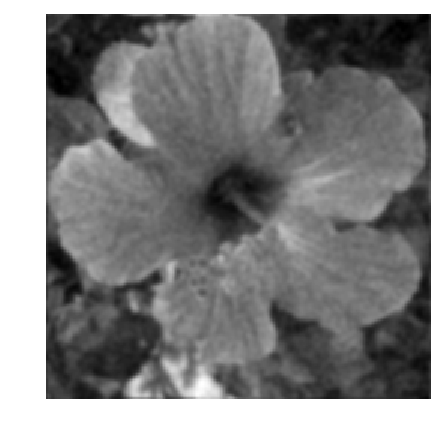

In [11]:
lambd = 1.5

figure(figsize = (5, 5))
imageplot(clamP(h(f, lambd)))

For linear operator, the dregree of freedom is equal to the trace of the operator, and
thus in our case it is equal to the sum of the Fourier transform
$$ \text{df}_\la(f) = \text{tr}(h_\la) = \sum_{\om} \hat g_\la(\om) $$
Note that we have made explicit the dependency of df with respect
to $\la$. Note also that df$(f)$ actually not actually depend on $f$.

In [12]:
df = lambd -> real(sum(plan_fft(g(lambd))*g(lambd)));

We can now define the SURE=SURE$_\la$ operator, as a function of $f, h(f),
\lambda$.

In [13]:
SURE = (f ,hf, lambd) -> -N*sigma^2 + vecnorm(hf - f)^2 + 2*sigma^2*df(lambd); # vecnorm is for Frobenius norm

(::#13) (generic function with 1 method)

__Exercise 1__

For a given $\lambda$, display the histogram of the repartition of
the quadratic error $\norm{y-h(y)}^2$ and of $\text{SURE}(y)$.
Compute these repartition using Monte-Carlo simulation (you need to
generate lots of different realization of the noise $W$).
Display in particular the location of the mean of these quantities.

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in (::##15#17)(::Array{Any,1}) at C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_9_sure\exo1.jl:26
 in include_from_node1(::String) at .\loading.jl:488
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_9_sure\exo1.jl, in expression starting on line 31


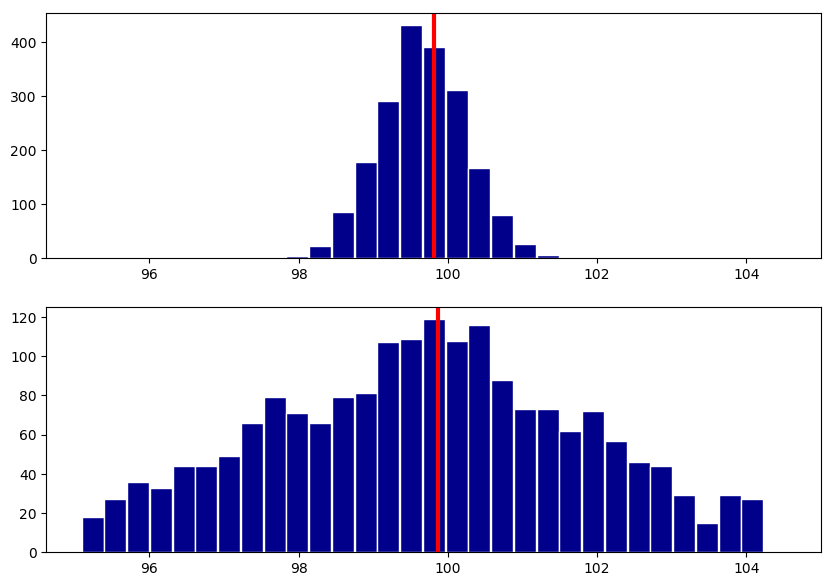

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in (::##15#17)(::Array{Any,1}) at C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_9_sure\exo1.jl:26
 in include_from_node1(::String) at .\loading.jl:488
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_9_sure\exo1.jl, in expression starting on line 37


In [14]:
include("NtSolutions\\denoisingadv_9_sure\\exo1.jl") #It takes time to run

# ntrials = 100
# nlaunch = 20
# E0 = []
# E = []

# for i in 1:nlaunch

#     f = repeat(f0, inner = [1, 1, ntrials]) + sigma.*rand(Normal(), n, n, ntrials)
#     hf = h(f, lambd)

#     #quadratic error
#     e = sum((hf - repeat(f0, inner = [1, 1, ntrials])).^2, (1, 2))
#     E0 = [E0; e[:]]

#     #sure error
#     e = -N*sigma^2 + sum((hf - f).^2, (1, 2)) + 2*sigma^2*df(lambd)
#     E = [E; e[:]]
# end


# v_true = mean(E0)
# v_sure = mean(E)
# a = v_true - 8*stdm(E0, mean(E0))
# b = v_true + 8*stdm(E0, mean(E0))
# t = linspace(a, b, 31)
# mybar = e -> hist(e[collect((i > a) & (i < b) for i in E0)], t)

# figure(figsize = (10, 7))

# subplot(2,1,1)
# s = mybar(E0)[2]
# s = [s; 0]
# bar(t[1 : end], s, width = (b-a)/31, color = "darkblue", edgecolor = "white")
# axvline(v_true, color = "red", linewidth = 3)

# subplot(2,1,2)
# s = mybar(E)[2]
# s = [s; 0]
# bar(t[1 : end], s, width = (b-a)/31, color = "darkblue",edgecolor = "white")
# axvline(v_sure, color = "red", linewidth = 3)

# show()



In [15]:
## Insert your code here.

In practice, the SURE is used to set up the value of $\la$ from a
single realization $f=f_0+w$, by minimizing $\text{SURE}_\la(f)$.

__Exercise 2__

Compute, for a single realization $f=f_0+w$, the evolution
of

$$ E(\la) = \text{SURE}_\la(f) \qandq E_0(\lambda) = \norm{f-h_\la(f)}^2 $$
as a function of $\lambda$.

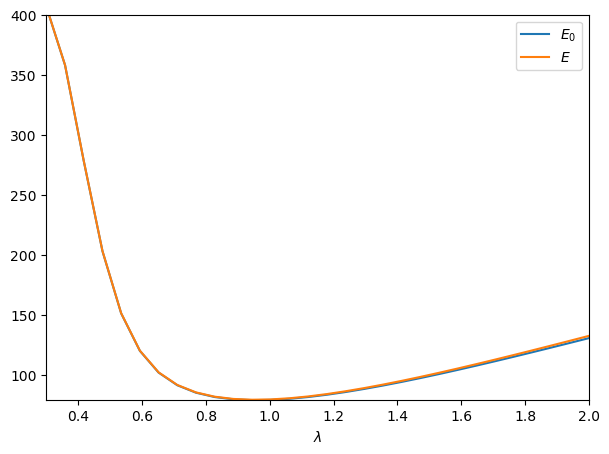

In [15]:
include("NtSolutions\\denoisingadv_9_sure\\exo2.jl")

In [17]:
## Insert your code here.

__Exercise 3__

Display the best denoising result $h_{\la^*}(f)$
where
$$\la^* = \uargmin{\la} \text{SURE}_\la(f) $$

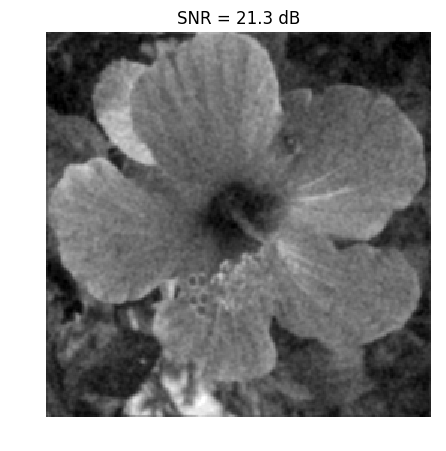

PyObject <matplotlib.text.Text object at 0x000000001AC60748>

In [16]:
include("NtSolutions\\denoisingadv_9_sure\\exo3.jl")

In [19]:
## Insert your code here.

Soft Thresholding SURE
----------------------
In order to enhance the denoising results for piecewise regular signal
and image, it is possible to use non-linear thresholding in an orthogonal wavelet
basis $ \Bb = \{ \psi_m \}_{m} $ where $\psi_m \in \RR^N$ is a wavelet element.


Re-generate a noisy image.

In [17]:
f = f0 + sigma.*rand(Normal(), n, n);

The soft-thresholding estimator thus reads
$$ h_\la(f) = \sum_m s_\la( \dotp{f}{\psi_m} ) \psi_m
      \qwhereq s_\la(\al) = \max\pa{0, 1-\frac{\la}{\abs{\al}}} \al. $$
It can be conveniently written as
$$ h_\la = \Ww^* \circ S_\la \circ \Ww $$
where $\Ww$ and $\Ww^*$ are forward and inverse wavelet transform
$$ \Ww(f) = ( \dotp{f}{\psi_m} )_m \qandq
      \Ww^*(x) = \sum_m x_m \psi_m, $$
and $ S_\la $ is the diagonal soft thresholding operator
$$ S_\la(x) = ( s_\la(x_m) )_m. $$


Define the wavelet transform and its inverse.

In [18]:
h_daub = compute_wavelet_filter("Daubechies", 4)
W  = f1 -> NtToolBox.perform_wavortho_transf(f1,0,+1,h_daub)
Ws = x -> NtToolBox.perform_wavortho_transf(x,0,-1,h_daub);

Display the wavelet transform $\Ww(f_0)$ of the original image.

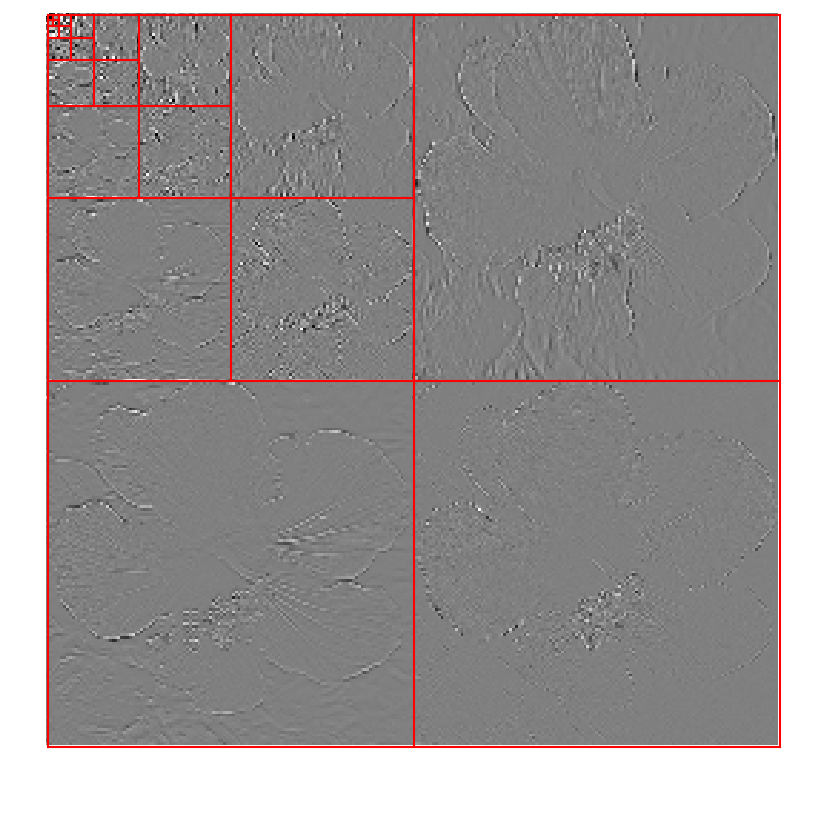

In [19]:
figure(figsize = (10,10))
plot_wavelet(W(f0), 1)
show()

Define the soft thresholding operator.

In [20]:
S = (x, lambd) -> max(0, 1 - lambd./max(1e-9, abs(x)) ) .* x;

Define the denoising operator.

In [21]:
h = (f1, lambd) -> Ws(S(W(f1), lambd));

Example of denoising result.

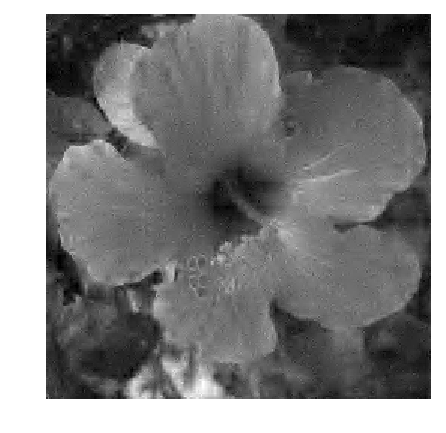

In [22]:
lambd = 3*sigma/2

figure(figsize = (5, 5))
imageplot(clamP(h(f,lambd)))

Since $Ww$ is an orthogonal transform, one has
$$ \text{df}(f) = \text{div}( S_\la )( \Ww(f) )
      = \sum_m s_\la'( \dotp{f}{\psi_m} ) = \norm{\Ww(h(f))}_0  $$
where $ s_\la' $ is the derivative of the 1-D function $s_\la$, and
$\norm{\cdot}_0$ is the $\ell^0$ pseudo-norm
$$ \norm{x}_0 = \abs{ \enscond{m}{x_m \neq 0} }. $$


To summarize, the degree of freedom is equal to the number of non-zero
coefficients in the wavelet coefficients of $h(f)$.

In [23]:
df = (hf, lambd) -> sum(abs(W(hf)) .> 1e-8);

We can now define the SURE operator, as a function of $f, h(f),
\lambda$.

In [24]:
SURE = (f, hf, lambd) -> -N*sigma^2 + vecnorm(hf - f)^2 + 2*sigma^2*df(hf, lambd);

__Exercise 4__

For a given $\lambda$, display the histogram of the repartition of
the quadratic error $\norm{y-h(y)}^2$ and of $\text{SURE}(y)$.
Compute these repartition using Monte-Carlo simulation (you need to
generate lots of different realization of the noise $W$).
Display in particular the location of the mean of these quantities.
_Hint:_ you can do the computation directly over the wavelet domain,
i.e. consider that the noise is added to the wavelet transform.

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in (::##33#35)(::Array{Any,1}) at .\In[25]:28
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading In[25], in expression starting on line 45


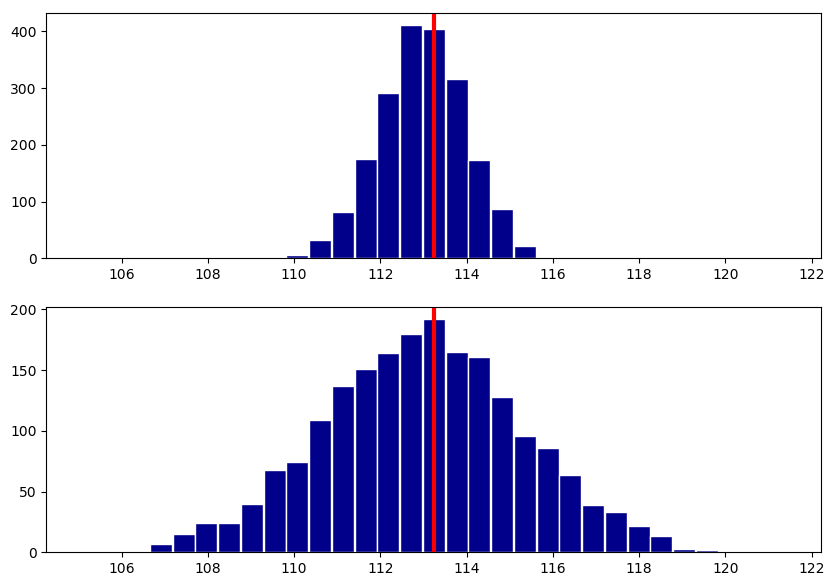

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in (::##33#35)(::Array{Any,1}) at .\In[25]:28
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading In[25], in expression starting on line 51


In [25]:
include("NtSolutions\\denoisingadv_9_sure\\exo4.jl")

In [29]:
## Insert your code here.

__Exercise 5__

Compute, for a single realization $f=f_0+w$, the evolution
of

$$ E(\la) = \text{SURE}_\la(f) \qandq E_0(\lambda) = \norm{f-h_\la(f)}^2 $$
as a function of $\lambda$.

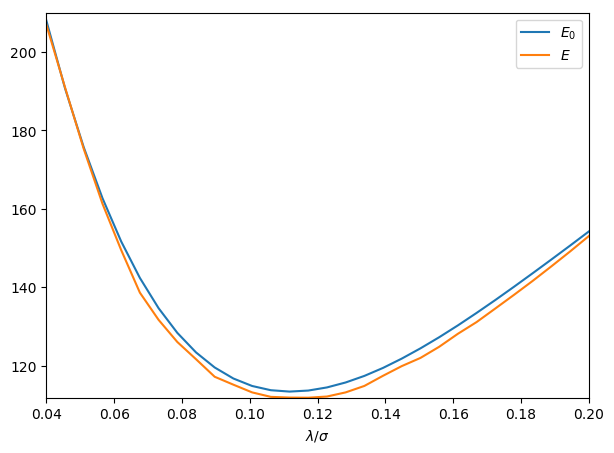

In [26]:
include("NtSolutions\\denoisingadv_9_sure\\exo5.jl")

In [31]:
## Insert your code here.

__Exercise 6__

Display the best denoising result $h_{\la^*}(f)$
where
$$\la^* = \uargmin{\la} \text{SURE}_\la(f) $$

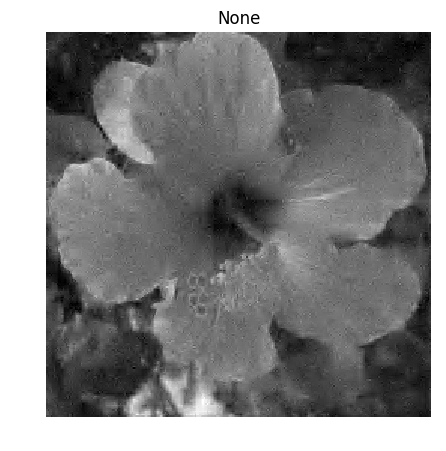

SNR = 19.7 dB

PyObject <matplotlib.text.Text object at 0x0000000027145080>

In [36]:
include("NtSolutions\\denoisingadv_9_sure\\exo6.jl")

In [33]:
## Insert your code here.

Block-soft Thresholding SURE
----------------------------
To improve the result of soft thresholding, it is possible to threshold
blocks of coefficients.


We define a partition $ \{1,\ldots,N\} = \cup_k b_k $ of the set of wavelet
coefficient indexes. The block thresholding is defined as

$$ h_\la(f) = \sum_k \sum_{m \in b_k} a_\la( e_k ) \dotp{f}{\psi_m} \psi_m
      \qwhereq
      e_k = \sum_{m \in b_k} \abs{\dotp{f}{\psi_m}}^2,
$$
where we use the James-Stein attenuation threshold
$$
      a_\la(e) = \max\pa{ 0, 1 - \frac{\la^2}{e^2} }.
$$


The block size $q$.

In [26]:
q = 4;

4

A function to extract blocks.

In [34]:
include("ndgrid.jl")

(X, Y, dX, dY) = ndgrid(1:q:n-q+1, 1:q:n-q+1, 0:q-1, 0:q-1)
I = X + dX + (Y + dY - 1).*n
I

for i in 1:Base.div(n, q)
    for j in Base.div(n, q)
        I[i,j, :, :] = transpose(I[i,j, :, :])
    end
end


blocks = fw -> fw[I]





(::#49) (generic function with 1 method)

}) in module Main at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3 overwritten at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3.


A function to reconstruct an image from blocks.

In [35]:
function assign(M, I, H)
    M_temp = M
    M_temp[I] = H
    return reshape(M_temp, n,n)
end

unblock = H -> assign(zeros(n,n), I, H)

(::#51) (generic function with 1 method)

Compute the average energy of each block, and duplicate.

In [47]:
function energy(H)
    H_tmp = copy(H)
    for i in 1:Base.div(n, q)
        for j in 1:Base.div(n, q)
            H_tmp[i, j, :, :] = mean(H_tmp[i, j, :, :].^2).*ones(q, q)
        end
    end
    return H_tmp
end

energy (generic function with 1 method)

.


Threshold the blocks. We use here a Stein block thresholding.
All values within a block are atenuated by the same factor.

In [52]:
S = (H,lambda) -> max(1 - lambda^2 ./ energy(H), 0) .* H

(::#57) (generic function with 1 method)

Block thresholding estimator $h_\lambda(f)$.

In [53]:
h = (f, lambd) -> Ws(unblock(S(blocks(W(f)), lambd)))

(::#59) (generic function with 1 method)

Example of block denoising.

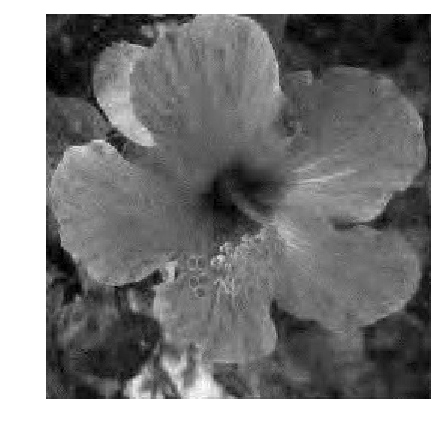

In [56]:
lambd = 1.1*sigma

figure(figsize = (5, 5))
imageplot(clamP(h(f, lambd)))


Since the block-thresholding operates in a block diagonal manner over the
wavelet coefficients, it degree of freedom is a sum of the divergence of
each block James-Stein operator
$$
  \text{df}(f) = \sum_{ e_k > \la^2 } \text{tr}( \partial \phi (a_k) )
$$
where $ a_k = (\dotp{f}{\psi_m})_{m \in b_k} $ is the set of coefficients
inside a block, that satisfies $\norm{a_k}=e_k$, and
where
$$ \phi(a) = \pa{ 1 - \frac{\la^2}{\norm{a}^2} } a. $$
One can compute explicitely the derivative of $\phi$
$$ \partial \phi(a) = \pa{ 1 - \frac{\la^2}{\norm{a}^2} } \text{Id} + 2 \frac{\la^2}{\norm{a}^2} \Pi_a $$
where $\Pi_a$ is the orthogonal projector on $a$.


This gives the folowing formula for the degree of freedom
$$
  \text{df}(f) = \norm{\Ww(h_\la(f))}_0
+ \sum_{ e_k > \la^2 }
  \frac{\la^2}{e_k} (2-\abs{b_k}).
$$
One can note that the degree of freedom differs from the one of the soft thresholding
(it is not in general an integer).